<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/Flight_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Время летать - занятие 2

## Введение в машинное обучение. Задача регрессии


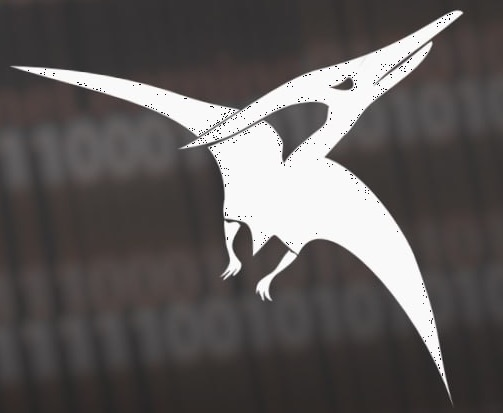

Цели ноутбука:

* Научиться обучать линейную регрессию и оценивать ее качество

Будем обучать регрессию для прогнозирования возраста крабов по их различным характеристикам!

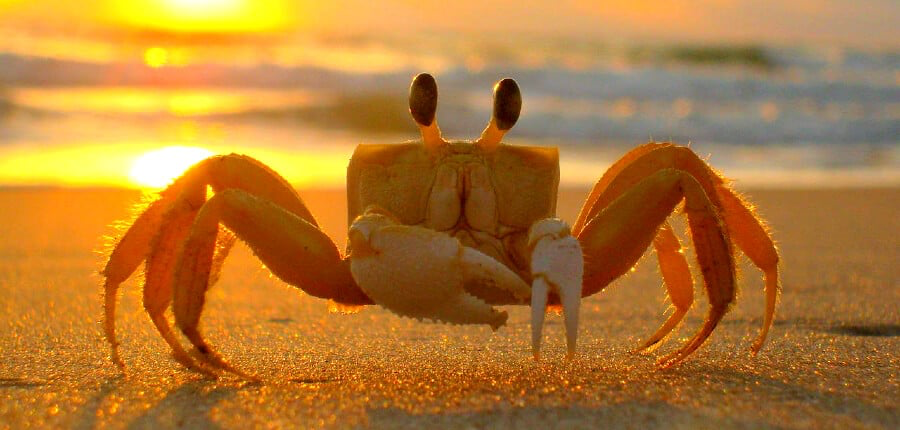

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CrabeAge.csv")

Описание данных (из оригинального источника):

* Sex	(object) - gender of the crab (Male, Female, Intermediate)

* Length (float) - length of the crab, in foot

* Diameter (float) - diameter of the crab, in foot

* Height (float) - height of the crab, in foot

* Weight (float) - weight of the crab, in ounces

* Shucked Weight (float) - weight without the shell, in ounces

* Viscera Weight (float) - deep abdominal organs weight, in ounces

* Shell Weight (float) - weight of the shell, in ounces

* Age	(int)	- age of the crab, in months

In [ ]:
df.head()

In [ ]:
df.shape

(3893, 9)

Сформируем матрицу объект-признак `X` и вектор целевой переменной `y`.

In [ ]:
X = df.drop(['Sex', 'Age'], axis=1) # матрица объект-признак
y = df['Age'] # target

X.head()

Разобъем данные на обучающую и тестовую части.

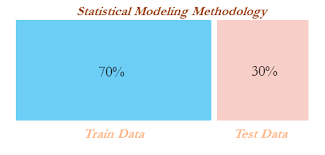

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

### Обучим линейную регрессию

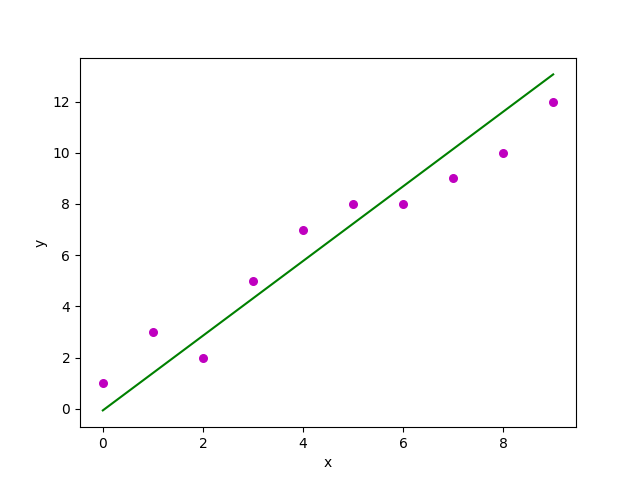

Линейная регрессия прогнозирует целевую переменную по формуле

$$a(x) = w_0 + w_1x_1 + w_2x_2 + ... +w_dx_d,$$
где

* $x_1, x_2, ..., x_d$ - признаки объекта

* $w_0, w_1, ..., w_d$ - веса модели (подбираются автоматически в процессе обучения)

* $a(x)$ - прогноз целевой переменной на объекте $x$.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Оценим качество прогноза

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)

pred[:10]

In [ ]:
y_test[:10].values

array([ 6,  8, 11,  9,  6, 16, 13, 13,  8,  9])

In [ ]:
mean_squared_error(y_test, pred) ** 0.5 # RMSE

2.1996910496301276

<Axes: >

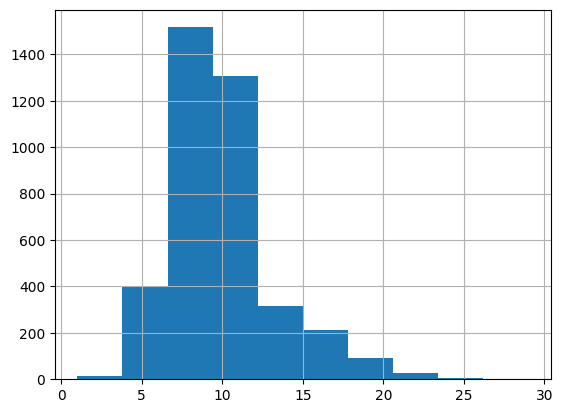

In [ ]:
df['Age'].hist()

## Метрики качества в задаче регрессии

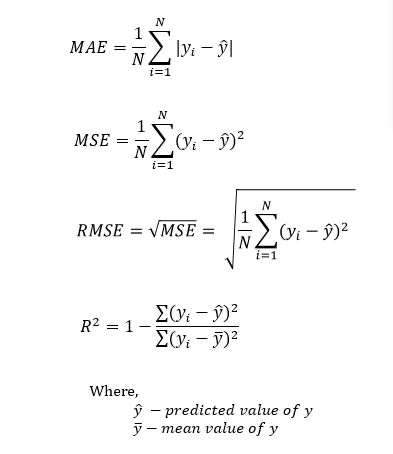

In [ ]:
r2_score(y_test, pred)

Есть ли переобучение?

In [ ]:
pred_train = model.predict(X_train)

r2_score(y_train, pred_train)

Переобучения нет. Будем пытаться улучшить качество модели.

### Добавление категориального признака

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Age', data=df)

plt.title('Средний возраст в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Средний возраст')

plt.show()

One-Hot кодирование

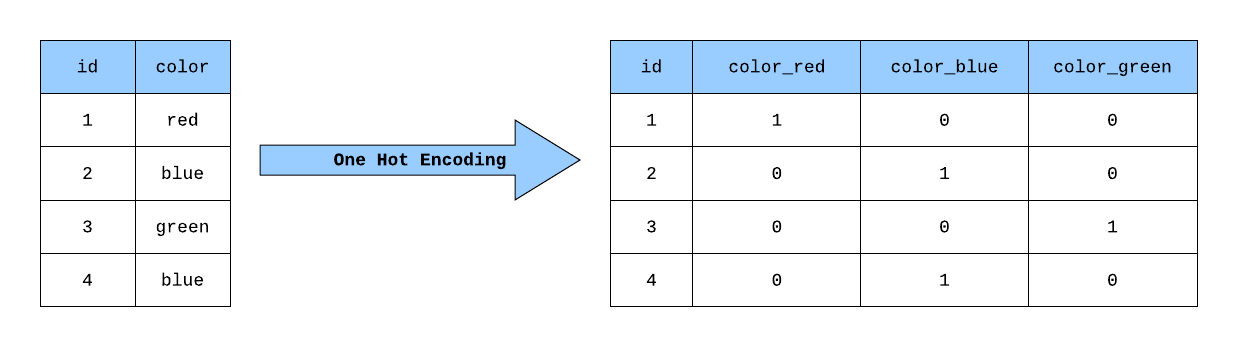

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first = True, dtype = int)

df_encoded.head()

In [ ]:
X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train_enc, y_train_enc)

pred_enc = model.predict(X_test_enc)

In [ ]:
r2_score(y_test_enc, pred_enc)

Качество немного возросло.

## Обработка выбросов

In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Подозрительные столбцы: Height, Weight, Shell Weight (и может быть другие)

In [ ]:
np.percentile(df['Height'], 99), df['Height'].max()

(0.55, 2.825)

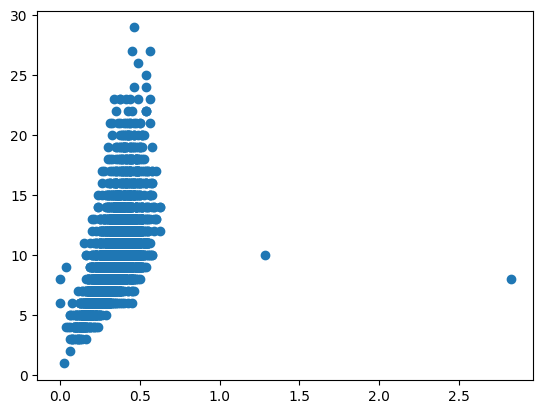

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df['Height'], df['Age'])

In [ ]:
np.percentile(df['Weight'], 99), df['Weight'].max()

(60.717825119999986, 80.10151225)

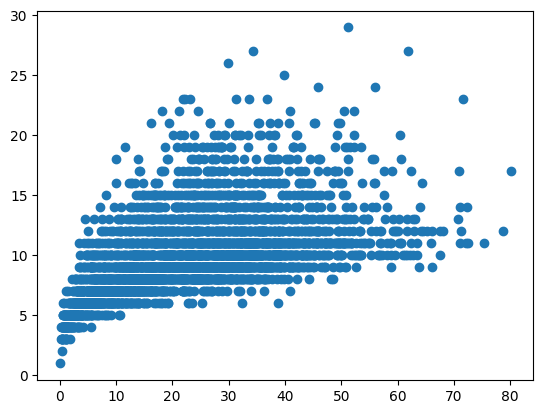

In [ ]:
plt.scatter(df['Weight'], df['Age'])

In [ ]:
np.percentile(df['Shell Weight'], 99), df['Shell Weight'].max()

(17.57669, 28.4912475)

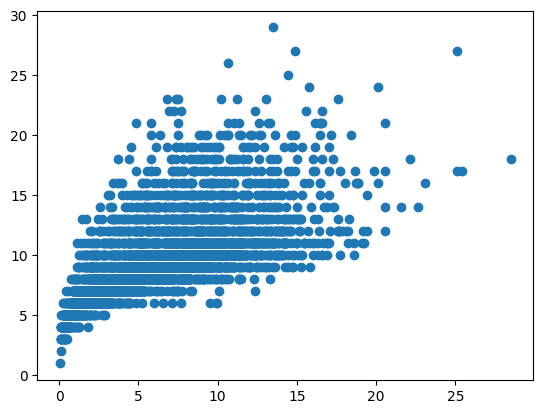

In [ ]:
plt.scatter(df['Shell Weight'], df['Age'])

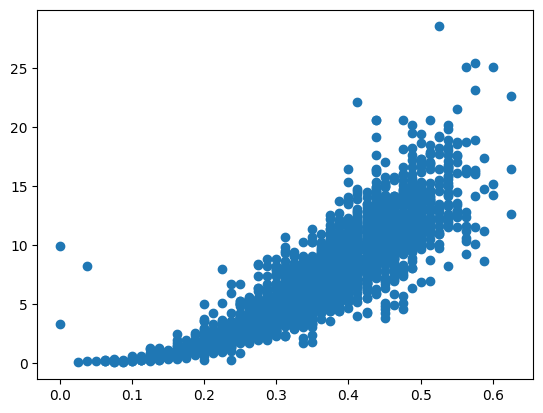

In [ ]:
df_clean = df.copy()
df_clean = df_clean[df_clean['Height'] < 1]

plt.scatter(df_clean['Height'], df_clean['Shell Weight'])

Оставим только объекты с Height < 1.

In [ ]:
df_encoded = df_encoded[df_encoded['Height'] < 1]

X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train_enc, y_train_enc)

pred_enc_clean = model.predict(X_test_enc)

In [ ]:
r2_score(y_test_enc, pred_enc_clean)

In [ ]:
df_encoded.head()

# Занятие 2

# Улучшение модели: Feature Engineering

## Шаг 1. Изучение зависимостей целевой переменной от признаков

In [ ]:
for c in df_encoded.columns:
    print(c)
    plt.scatter(df_encoded[c], df_encoded['Age'])
    plt.show()

In [ ]:
corr = df_encoded.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
corr = df_encoded.corr(method='spearman') # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

Мы видим некоторые нелинейные зависимости - это видно и по графикам, и по соотношение корреляций Пирсона и Спирмена.

Сделаем логарифмическое преобразование и снова посмотрим на вид зависимостей.

In [ ]:
plt.scatter(np.log1p(df['Shell Weight']), df['Age'])

In [ ]:
np.corrcoef(df['Shell Weight'], df['Age'])[0][1]

In [ ]:
np.corrcoef(df['Shell Weight'] ** 0.5, df['Age'])[0][1]

In [ ]:
np.corrcoef(np.log1p(df['Shell Weight']), df['Age'])[0][1]

In [ ]:
def get_dependency(column):
    print(np.corrcoef(df_encoded[column], df_encoded['Age'])[0][1])
    print(np.corrcoef(df_encoded[column] ** 0.5, df_encoded['Age'])[0][1])
    print(np.corrcoef(np.log1p(df_encoded[column]), df_encoded['Age'])[0][1])

for c in df_encoded.columns:
    print(c)
    get_dependency(c)

In [ ]:
df_encoded['log Weight'] = np.log1p(df_encoded['Weight'])
df_encoded['log Shucked Weight'] = np.log1p(df_encoded['Shucked Weight'])
df_encoded['log Viscera Weight'] = np.log1p(df_encoded['Viscera Weight'])

df_encoded.drop(['Weight', 'Shucked Weight', 'Viscera Weight'], axis=1, inplace=True)

In [ ]:
X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train_enc, y_train_enc)

pred_enc_clean = model.predict(X_test_enc)

r2_score(y_test_enc, pred_enc_clean)

После логарфмирования некоторых признаков удалось увеличить качество модели с 0.536 до 0.551.

## Шаг 2: изучение попарных зависимостей - полиномиальные признаки

Добавим полиномиальных признаков степени 2 и 3.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge, Lasso

model = LinearRegression()

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('lin_reg', model)
])

# Обучаем модель
pipeline.fit(X_train_enc, y_train_enc)

# Делаем предсказания
y_pred = pipeline.predict(X_test_enc)

In [ ]:
r2_score(y_test_enc, y_pred)

In [ ]:
pred_train = pipeline.predict(X_train_enc)

r2_score(y_train_enc, pred_train)

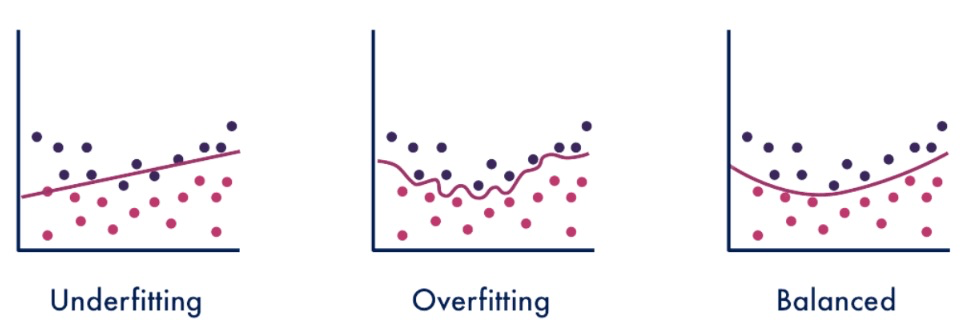

Переобучились =(

In [ ]:
# Получаем имена полиномиальных признаков
poly_features = pipeline.named_steps['poly_features']
feature_names = poly_features.get_feature_names_out()

# Получаем веса линейной регрессии
lin_reg = pipeline.named_steps['lin_reg']
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

# Создаем DataFrame с весами признаков
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
}).sort_values(by='Weight')

In [ ]:
weights_df

Добавим регуляризацию (модели Ridge, Lasso).

Эти модели требуют также масштабирования признаков.

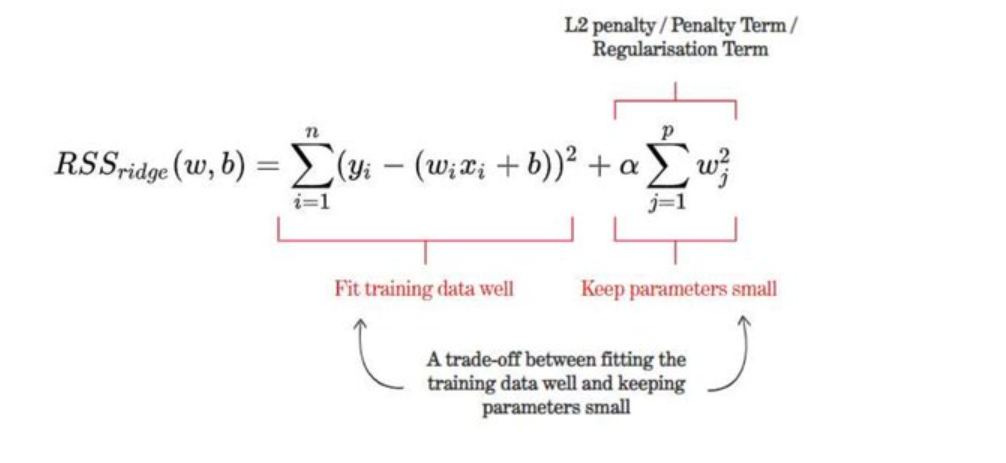

In [ ]:
model = Ridge(alpha = 0.01)

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', MinMaxScaler()),
    ('lin_reg', model)
])

# Обучаем модель
pipeline.fit(X_train_enc, y_train_enc)

# Делаем предсказания
pred_train = pipeline.predict(X_train_enc)
y_pred = pipeline.predict(X_test_enc)

r2_score(y_train_enc, pred_train), r2_score(y_test_enc, y_pred)

Удалось не переобучиться и поднять качество с 0.551 до 0.572.

In [ ]:
# Получаем имена полиномиальных признаков
poly_features = pipeline.named_steps['poly_features']
feature_names = poly_features.get_feature_names_out()

# Получаем веса линейной регрессии
lin_reg = pipeline.named_steps['lin_reg']
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

# Создаем DataFrame с весами признаков
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
}).sort_values(by='Weight')

weights_df

Проверим быстрое и самое популярное решение - CatBoost.

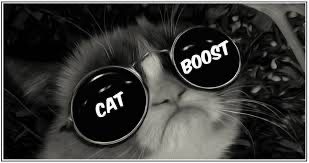

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(n_estimators=100)

cb.fit(X_train_enc, y_train_enc)

pred_train = cb.predict(X_train_enc)
y_pred = cb.predict(X_test_enc)

r2_score(y_train_enc, pred_train), r2_score(y_test_enc, y_pred)

Успеха нет. Двигаемся дальше.

## Шаг 3: отбор признаков

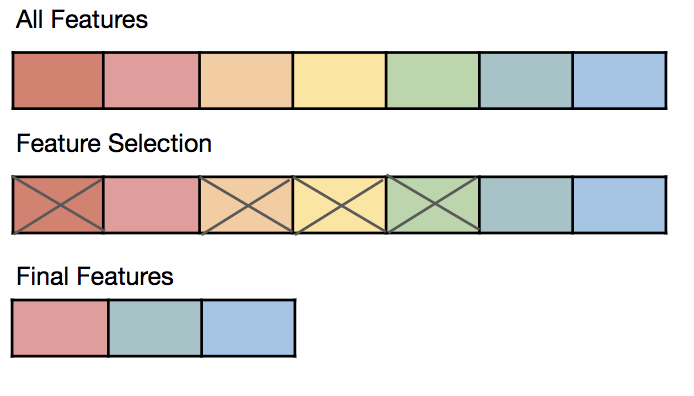

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif

model = Ridge(alpha = 0.01)

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=180)),
    ('lin_reg', model)
])

# Обучаем модель
pipeline.fit(X_train_enc, y_train_enc)

# Делаем предсказания
pred_train = pipeline.predict(X_train_enc)
y_pred = pipeline.predict(X_test_enc)

r2_score(y_train_enc, pred_train), r2_score(y_test_enc, y_pred)

Удалось еще немного поднять качество - с 0.572 до 0.576

## Шаг 4: анализ решения => смена функции потерь

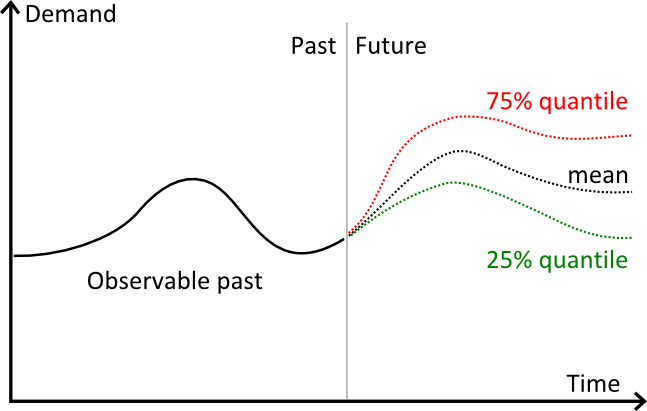

In [ ]:
plt.scatter(y_test_enc, y_pred)

In [ ]:
plt.plot(y_test_enc-y_pred,'*')
plt.axhline(y=0, color='red', linestyle='--')

Прогнозы в среднем занижены, поэтому будем прогнозировать 60%-квантиль целевой переменной, то есть сознательно будем завышать прогноз.

In [ ]:
from sklearn.linear_model import QuantileRegressor

model = QuantileRegressor(quantile=0.6, solver="highs", alpha=0.00001)

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=180)),
    ('lin_reg', model)
])

# Обучаем модель
pipeline.fit(X_train_enc, y_train_enc)

# Делаем предсказания
pred_train = pipeline.predict(X_train_enc)
y_pred = pipeline.predict(X_test_enc)

r2_score(y_train_enc, pred_train), r2_score(y_test_enc, y_pred)

In [ ]:
plt.scatter(y_test_enc, y_pred)

In [ ]:
plt.plot(y_test_enc-y_pred,'*')
plt.axhline(y=0, color='red', linestyle='--')

Удалось поднять качество с 0.572 до 0.584.

## Итоги:

Базовая линейная регрессия показывает качество $R2 = 0.511$

**Были сделаны следующие шаги, каждый из которых улучшил качество:**

* One-hot кодирование категориального признака `Sex`

* Удаление двух объектов (очевидные выбросы или ошибки)

* Логарифмирование нескольких признаков

* Добавление полиномиальных признаков степени 2 и 3 с последующей регуляризацией

* Отбор признаков при помощи SelectKBest

* Смена функции потерь с MSE на квантильные потери с $q=0.6$.

Итоговый результат: $R2 = 0.584$

**Было проведено множество экспериментов, но в ноутбуке отражены только удачные!! Не любой подход улучшает качество.**

**Стандартное быстрое решение - CatBoost - не всегда спасает.**